In [1]:
import pandas as pd
import numpy as np

# Finance Library import
import os
import sys
sys.path.append("C:\\DualMomentum\\BackTesting")
from Library import FinanceLibrary as fl

In [2]:
df_kodex = pd.read_csv("..\\Data\\KODEX200_data.csv", encoding="utf-8", engine="python")

In [3]:
df_kodex.index = pd.to_datetime(df_kodex["Date"])
df_kodex = df_kodex["2017-05":"2018-08"]

In [8]:
df_kodex.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 2017-05-02 to 2018-08-31
Data columns (total 7 columns):
Date      326 non-null object
Change    326 non-null float64
Close     326 non-null int64
High      326 non-null int64
Low       326 non-null int64
Open      326 non-null int64
Volume    326 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 27.1+ KB


In [4]:
KODEX = df_kodex[["High","Low","Close"]]
atr = fl.ATR(KODEX["High"],KODEX["Low"],KODEX["Close"],14)
atr = atr.dropna()

dual_atr = fl.DualATR(KODEX["High"],KODEX["Low"],KODEX["Close"])
dual_atr = dual_atr.dropna()

In [5]:
xmin= "2017-12-01"
xmax = "2018-01-31"
entry = KODEX["Close"].loc[xmin]
stop_loss = int(entry) - atr[0] * 2
break_point = entry
TS = KODEX["Close"].rolling(window=20).max() - atr
TS2 = KODEX["Close"].rolling(window=20).max() - dual_atr

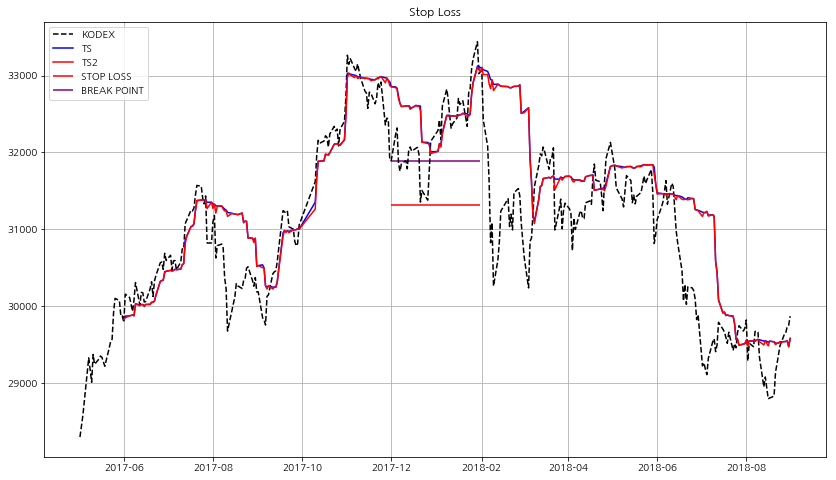

In [7]:
import matplotlib.pyplot as plt
#한글폰트사용하기
from matplotlib import rc, font_manager
import matplotlib
rc("font", family="NanumGothic")
matplotlib.rcParams['axes.unicode_minus'] = False
%matplotlib inline

fig = plt.figure(figsize=(14,8))
ax1 = fig.add_subplot(1,1,1)

ax1.set_title("Stop Loss")
ax1.plot(KODEX["Close"],color="Black",linestyle="--", label="KODEX")
ax1.plot(TS, color="Blue", label="TS")
ax1.plot(TS2, color="Red",label="TS2")
ax1.hlines(y=stop_loss,xmin=xmin,xmax=xmax,color="Red", label="STOP LOSS")
ax1.hlines(y=break_point,xmin=xmin,xmax=xmax,color="Purple", label="BREAK POINT")
ax1.grid()
ax1.legend(loc=2)

# 차트끼리 충돌을 방지합니다.
# plt.tight_layout()